In [1]:
import meld
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

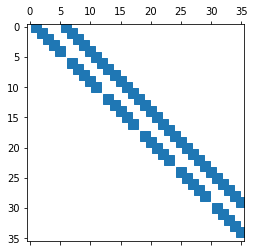

In [31]:
test_conn = meld.cluster.sparse_dim_connectivity([meld.cluster.simple_neighbors_1d(n)
                                               for n in (6,6)])

plt.spy(test_conn)

#test_conn.col[test_conn.row==1]
#test_conn.row[test_conn.col==1]

In [32]:
# we assume all pixels have unit area
pixelSize = 1

# TFCE parameters
E = 2/3
H = 2

In [33]:
# Test Case #1 : single non-zero pixel

test = np.array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  5. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])


trueTFCE = np.power(pixelSize,E) * np.power(5.,H+1) / (H+1)
trueTFCE

41.666666666666664

Approximate the integral as: $\int_0^h_p e(h)^E h^H dh \approx \sum_{i=0}^{i=\frac{h_p}{\delta h}} e(i \delta h)^E (i \delta h)^H \delta h$

In [5]:
dh = .01
np.sum(np.power(pixelSize, E) * np.power(np.arange(0.,5.,dh), H) * dh)

41.541750000000008

In [6]:
colData = test.flatten()
areaData = pixelSize * np.ones_like(colData)
tres_topdown = meld.cluster_topdown.tfce_pos(colData, areaData, test_conn, param_E = E, param_H = H)
tres_topdown

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  41.66666667,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [7]:
# Test Case #2 : single non-zero cluster
test = np.array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  5. ,  5. ,  0. ],
                 [ 0. ,  0. ,  0. ,  5. ,  5. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

trueTFCE = np.power(4*pixelSize,E) * np.power(5.,H+1) / (H+1)
trueTFCE

104.99342082457277

In [8]:
# run using cluster_topdown

colData = test.flatten()
areaData = pixelSize * np.ones_like(colData)
tres_topdown = meld.cluster_topdown.tfce_pos(colData, areaData, test_conn, param_E = E, param_H = H)
tres_topdown

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  104.99342082,  104.99342082,    0.        ,
          0.        ,    0.        ,    0.        ,  104.99342082,
        104.99342082,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

In [34]:
# Test Case #3 : two isolated non-zero clusters
test = np.array([[ 3. ,  3. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  0. ,  5. ,  5. ,  0. ],
                 [ 0. ,  0. ,  0. ,  5. ,  5. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

trueTFCE_3 = np.power(4*pixelSize,E) * np.power(5.,H+1) / (H+1)
print('trueTFCE_3 = ' + str(trueTFCE_3))

trueTFCE_5 = np.power(2*pixelSize,E) * np.power(3.,H+1) / (H+1)
print('trueTFCE_5 = ' + str(trueTFCE_5))

trueTFCE_3 = 104.993420825
trueTFCE_5 = 14.2866094677


In [35]:
# run using cluster_topdown

colData = test.flatten()
areaData = pixelSize * np.ones_like(colData)
tres_topdown = meld.cluster_topdown.tfce_pos(colData, areaData, test_conn, param_E = E, param_H = H)
tres_topdown

array([  14.28660947,   14.28660947,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  104.99342082,  104.99342082,    0.        ,
          0.        ,    0.        ,    0.        ,  104.99342082,
        104.99342082,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

In [36]:
# Test Case #3 : two non-isolated non-zero clusters (peaks)
test = np.array([[ 3. ,  3. ,  0. ,  0. ,  0. ,  0. ],
                 [ 3. ,  3. ,  2. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  2. ,  0. ,  0. ,  0. ],
                 [ 0. ,  0. ,  2. ,  5. ,  5. ,  0. ],
                 [ 0. ,  0. ,  0. ,  5. ,  5. ,  0. ],
                 [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

trueTFCE_2 = np.power(11*pixelSize,E) * np.power(2.,H+1) / (H+1)
print('trueTFCE_2 = ' + str(trueTFCE_2))

trueTFCE_3 = trueTFCE_2 + np.power(4*pixelSize, E) * ( np.power(3., H+1) - np.power(2., H+1) ) / (H+1)
print('trueTFCE_3 = ' + str(trueTFCE_3))

trueTFCE_5 = trueTFCE_2 + np.power(4*pixelSize, E) * ( np.power(5., H+1) - np.power(2., H+1) ) / (H+1)
print('trueTFCE_5 = ' + str(trueTFCE_5))

trueTFCE_2 = 13.1895665153
trueTFCE_3 = 29.1485664807
trueTFCE_5 = 111.463408407


In [37]:
# run using cluster_topdown

colData = test.flatten()
areaData = pixelSize * np.ones_like(colData)
tres_topdown = meld.cluster_topdown.tfce_pos(colData, areaData, test_conn, param_E = E, param_H = H)
tres_topdown

array([  29.14856648,   29.14856648,    0.        ,    0.        ,
          0.        ,    0.        ,   29.14856648,   29.14856648,
         13.18956652,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   13.18956652,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         13.18956652,  111.46340841,  111.46340841,    0.        ,
          0.        ,    0.        ,    0.        ,  111.46340841,
        111.46340841,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

In [2]:
import timeit

In [39]:
def tfce_old():
    meld.cluster.tfce(colData,dt=0.1, E=E, H=H,tail=1, connectivity = test_conn)

In [40]:
def tfce_topdown():
    meld.cluster_topdown.tfce_pos(colData, areaData, test_conn, param_E = E, param_H = H)

In [52]:
time_topdown = timeit.timeit(tfce_topdown, number=1000)
time_topdown

0.25345190000371076

In [42]:
timeit.timeit(tfce_old, number=1000)

9.084642599998915

In [43]:
9.08/.24889

36.481979991160756

In [ ]:
# we assume all pixels have unit area
pixelSize = 1

# TFCE parameters
E = 2/3
H = 2

d_values = np.arange(10,30,10)
numTimeit = 100

time_old = np.zeros_like(d_values)
time_topdown = np.zeros_like(d_values)

for i, d in enumerate(d_values):
    test = np.random.rand(d,d,d)*5
    test_conn = meld.cluster.sparse_dim_connectivity([meld.cluster.simple_neighbors_1d(n)
                                                      for n in test.shape])

    colData = test.flatten()
    areaData = pixelSize * np.ones_like(colData)

    def tfce_old():
        meld.cluster.tfce(colData,dt=0.001, E=E, H=H,tail=1, connectivity = test_conn)
    def tfce_topdown():
        meld.cluster_topdown.tfce_pos(colData, areaData, test_conn, param_E = E, param_H = H)

    time_old[i] = timeit.timeit(tfce_old, number=numTimeit)
    time_topdown[i] = timeit.timeit(tfce_topdown, number=numTimeit)


In [ ]:
plt.plot(d_values, time_old)
plt.plot(d_values, time_topdown)

In [7]:
timeit.timeit(tfce_old, number=numTimeit)

1.5840743999942788

In [8]:
timeit.timeit(tfce_topdown, number=numTimeit)

34.7920535000012

In [9]:
test

array([[[  4.96405272e-01,   8.74901511e-02,   3.31807321e-01, ...,
           1.25181195e-01,   4.92109071e-01,   4.14824089e-01],
        [  1.40409074e-01,   3.91662035e-01,   4.93035099e-01, ...,
           7.99155079e-01,   2.40309894e-01,   3.63874385e-01],
        [  2.10794882e-01,   7.23476965e-01,   5.82470216e-01, ...,
           2.76828929e-01,   8.25803141e-01,   2.22788881e-01],
        ..., 
        [  9.67279687e-01,   4.90616051e-01,   2.54703831e-01, ...,
           4.43809371e-01,   1.97695364e-01,   6.14973719e-01],
        [  4.67471529e-01,   8.80454500e-01,   8.36608208e-01, ...,
           1.04804142e-01,   2.18211897e-01,   7.06312295e-01],
        [  8.48278732e-01,   9.89023206e-01,   2.29914142e-01, ...,
           5.93062666e-01,   7.56112952e-01,   2.27222669e-01]],

       [[  9.95888629e-01,   6.41362174e-01,   1.23601417e-01, ...,
           9.80902904e-01,   5.85473481e-01,   7.11781049e-01],
        [  3.88003004e-01,   2.40893393e-01,   5.25280859e-0